In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
import matplotlib


In [2]:
#Read a DICOM series and write it as a single nrrd file.
img_path='F:\\archive\\data\\test\\100251\\2-0OPAGELSQXD3602.5120nullnullnull-72944' 
OUTPUT_DIR = 'output'
reader = sitk.ImageSeriesReader()
img_names = reader.GetGDCMSeriesFileNames(img_path)
reader.SetFileNames(img_names)
image = reader.Execute()
#image_array = sitk.GetArrayFromImage(image) # z, y, x
writer = sitk.ImageFileWriter()
writer.SetFileName("nrrdfile.nrrd")
writer.Execute(image)

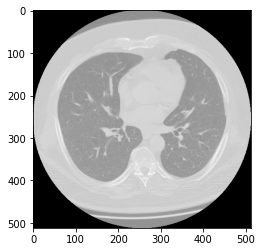

In [27]:
 
# Use the functional interface to read the image series.
img = sitk.ReadImage("nrrdfile.nrrd")
z = img.GetDepth()//2
plt.imshow(sitk.GetArrayViewFromImage(img)[z,:,:], cmap=plt.cm.Greys_r) 

In [28]:
def myshow(img, title=None, margin=0.05, dpi=80 ):
    nda = sitk.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    
    
    if nda.ndim == 3:
        # fastest dim, either component or x
        c = nda.shape[-1]
        
        # the the number of components is 3 or 4 consider it an RGB image
        if not c in (3,4):
            nda = nda[nda.shape[0]//2,:,:]
    
    elif nda.ndim == 4:
        c = nda.shape[-1]
        
        if not c in (3,4):
            raise Runtime("Unable to show 3D-vector Image")
            
        # take a z-slice
        nda = nda[nda.shape[0]//2,:,:,:]
            
    ysize = nda.shape[0]
    xsize = nda.shape[1]
   
    
    # Make a figure big enough to accomodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (1 + margin) * ysize / dpi, (1 + margin) * xsize / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    
    extent = (0, xsize*spacing[1], ysize*spacing[0], 0)
    
    t = ax.imshow(nda,extent=extent,interpolation=None)
    
    if nda.ndim == 2:
        t.set_cmap("gray")
    
    if(title):
        plt.title(title)
    

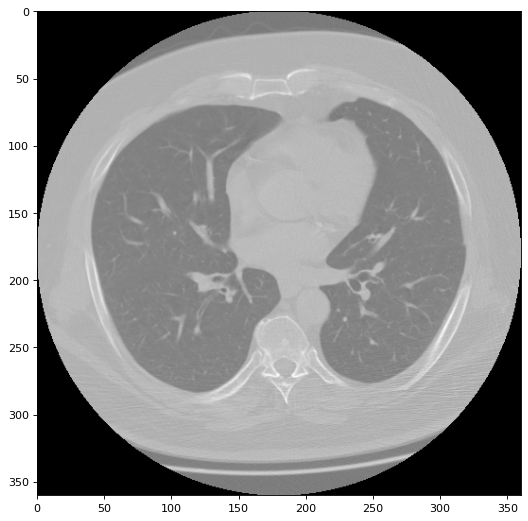

In [39]:
size = img.GetSize()
size
myshow(img[:,:,:])

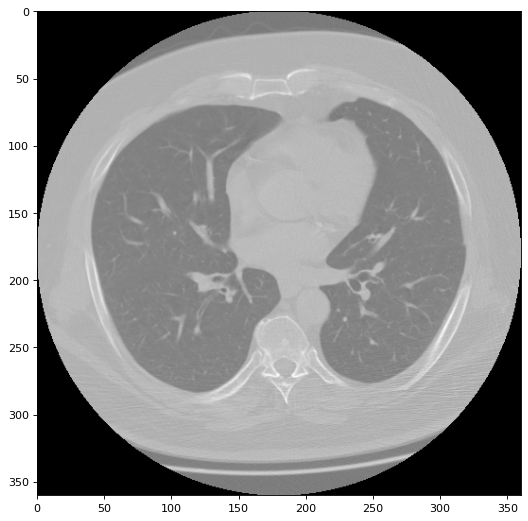

In [30]:
myshow(img)


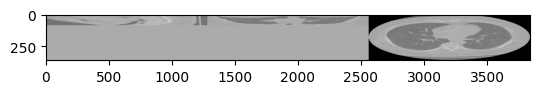

In [33]:
slices =[img[size[0]//2,:,:], img[:,size[1]//2,:], img[:,:,size[2]//2]]
myshow(sitk.Tile(slices, [3,1]), dpi=100)